* Authors: Andrea Jiménez Zuñiga e Isabel Afán de Ribera
* Date: 04/12/2020
* Institution: CUNEF

# 06. XGBOOST

To validate our model is necessary to split the data set in a training and test set. To do this, the data is randomly divided by applying 80% of the observations to training and the remaining 20% to test.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report


* __Reading the Data File__ 

In [3]:
data_path = '../data/Engineering_loans_final_3.csv'
loans = pd.read_csv(data_path)
loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
0,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,...,-0.373774,-0.165271,-0.136688,2.147209,1.0,2.0,1.0,0.0,3.0,0.0
1,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,...,-0.373774,-1.402368,-0.136688,-0.371165,1.0,3.0,2.0,4.0,22.0,1.0
2,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,...,-0.373774,-0.603693,-0.136688,-0.371165,1.0,1.0,2.0,0.0,3.0,0.0
3,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,...,-0.373774,-0.944687,-0.136688,4.665582,1.0,3.0,2.0,2.0,14.0,1.0
4,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,...,0.716149,-0.859722,-0.136688,-0.371165,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,...,-0.373774,0.977797,-0.136688,-0.371165,1.0,3.0,1.0,3.0,15.0,2.0
462187,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,...,0.716149,0.593754,-0.136688,-0.371165,0.0,1.0,1.0,1.0,9.0,2.0
462188,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,...,-0.373774,1.410555,-0.136688,2.147209,0.0,3.0,2.0,3.0,16.0,2.0
462189,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,...,0.716149,0.990259,-0.136688,-0.371165,0.0,3.0,2.0,4.0,22.0,1.0


In [4]:
#loans = loans.iloc[:,1:500]
#data = data.dropna()
#loans.head()

* __Splitting the data into train and test set__

Here we split in training and test.

In [5]:
X = loans.drop(['loan_status'], axis = 1).values
Y = loans['loan_status'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12345)

* __Fitting the model and Prediction__

In [10]:
%%time
xgboost = xgb.XGBClassifier(n_estimators=500, subsample=0.8,
                            colsample_bytree=0.8,objective= 'binary:logistic',
                            scale_pos_weight=1, seed=12345, nthread = 6)
xgboost.fit(X_train, Y_train)

CPU times: user 11min 31s, sys: 1min 18s, total: 12min 50s
Wall time: 3min 17s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=6, nthread=6, num_parallel_tree=1,
              random_state=12345, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=12345, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Next, we make the predictions using the subset above, which is the test set.

In [11]:
Y_pred_XGBoost2 = xgboost.predict(X_test)

In [12]:
accuracy_score(Y_test, Y_pred_XGBoost2)

0.7536429429137053

In this case we can see that the accuracy is 75%.

## Model Evaluation

* __Confussion Matrix__

In order to be able to illustrate the confusion matrix, a function called plot_confusion_matrix has been defined, indicating the parameters to be taken into account.

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools # aplanar arrays


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We proceed to graph the confussion matrix:

Confusion matrix, without normalization
[[ 5076 18360]
 [ 4413 64590]]
              precision    recall  f1-score   support

         0.0       0.53      0.22      0.31     23436
         1.0       0.78      0.94      0.85     69003

    accuracy                           0.75     92439
   macro avg       0.66      0.58      0.58     92439
weighted avg       0.72      0.75      0.71     92439



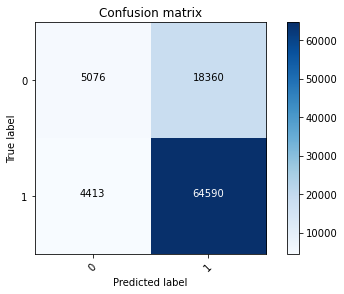

In [14]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_XGBoost2)
plot_confusion_matrix(cnf_matrix, classes=[0,1])
print(classification_report(Y_test,Y_pred_XGBoost2))

In [15]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_XGBoost2).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  5076
False Positives:  18360
False Negatives:  4413
True Positives:  64590


With the confusion matrix we can see that there are 64.590 true positives in total, which means that those loans that have been classified as fully paid are correctly placed.

On the other hand,  we can see that there are 5.076 true negatives in total, which means that those loans that have been classified as not paid are correctly placed.

It can be seen as well, that there is a total of 18.360 and 4.413 false positives and false negatives, respectively. This means that these loans have been misplaced.

* __Normalized Confussion Matrix__

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.21658986 0.78341014]
 [0.06395374 0.93604626]]


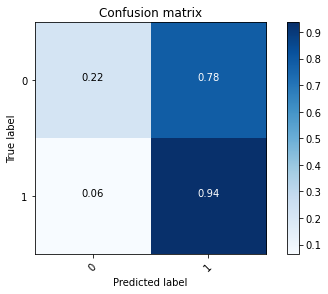

In [17]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_XGBoost2)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [19]:
xgboost.score(X_test, Y_test)

0.7536429429137053

* __Precision, Accuracy, Recall, F1-score and Support__

In [20]:
print('XGBoost')
print(classification_report(Y_test,Y_pred_XGBoost2))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgboost.score(X_test, Y_test)))
print('')

XGBoost
              precision    recall  f1-score   support

         0.0       0.53      0.22      0.31     23436
         1.0       0.78      0.94      0.85     69003

    accuracy                           0.75     92439
   macro avg       0.66      0.58      0.58     92439
weighted avg       0.72      0.75      0.71     92439

Accuracy of XGBoost classifier on test set: 0.75



* __ROC Curve__

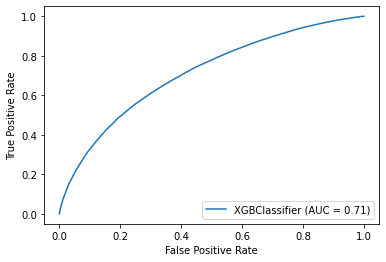

XGBoost score train:  0.8030139120275211
XGBoost score:  0.7536429429137053


In [23]:
metrics.plot_roc_curve(xgboost, X_test, Y_test)
plt.show()                     
print("XGBoost score train: ", xgboost.score(X_train, Y_train))
print("XGBoost score: ", xgboost.score(X_test, Y_test))

* __Feature Importances__

In [39]:
X_col = loans.drop(['loan_status'], axis = 1)
Y_col = loans['loan_status']

In [38]:
def plot_feature_importances(xgboost,X_train):
    
    xaxes=list(X_col.columns.values)
    yaxes=list(xgboost.feature_importances_)
    
    h=dict(zip(xaxes,yaxes))
    s = [(k, h[k]) for k in sorted(h, key=h.get, reverse=False)]
    s=dict(s)
    xaxes=list(s.keys())
    yaxes=list(s.values())
    
    n_features = X_col.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), yaxes, align='center') 
    plt.yticks(np.arange(n_features), xaxes) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

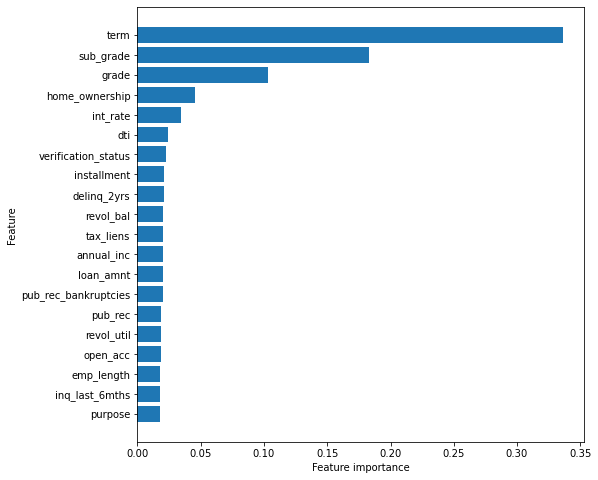

In [40]:
plot_feature_importances(xgboost,X_train)

* **Errors**

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_XGBoost2))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_XGBoost2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_XGBoost2)))

Mean Absolute Error: 0.24635705708629474
Mean Squared Error: 0.24635705708629474
Root Mean Squared Error: 0.4963436884723072


* __Using hyperparameters__

In [41]:
param_test2 = {
 'learning_rate':np.arange(0.1,2.0,0.2),
 'objective':['binary:logistic'],
 'gamma': [0.5, 1, 1.5, 2],
 'subsample': [0.6, 0.8, 1.0],
 'colsample_bytree': [0.6, 0.8, 1.0],
 'max_depth': [3, 4, 5, 8]
}
gsearch_XGBoost = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=500, subsample=0.8,
                                                             colsample_bytree=0.8,objective= 'binary:logistic',
                                                             scale_pos_weight=1, seed=12345, nthread = 6), 
                               param_grid = param_test2, scoring='roc_auc',n_jobs=-2,iid=False, cv=5)
gsearch_XGBoost.fit(X_train, Y_train)



In [ ]:
%%time
gsearch_XGBoost2 = gsearch_XGBoost.best_estimator_
gsearch_XGBoost2.fit(X_train, Y_train)

In [6]:
Y_pred_XGBoost2 = gsearch_XGBoost2.predict(X_test)

* __Saving the model__ 

In [43]:
model = xgboost
filename = 'modelo_xgboost.pkl'
pickle.dump(model,open(filename,'wb'))